## Problem Set 01
### AST 8110, Fall 2022
#### Tyler Barna

In [1]:
## Importing packages (some of these may not be useful)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numba
import time
import sys
import os
import astropy
import astropy.units as u
import astropy.constants as const
import astropy.coordinates as coord
import random
from tqdm import tqdm
from numba import jit

## Set Seed
random.seed(8110)

[[ 17.972 -75.784]
 [-74.421  29.004]
 [ 79.038 -78.432]
 ...
 [ 61.379 -39.951]
 [-83.112  29.521]
 [-19.634  30.982]]


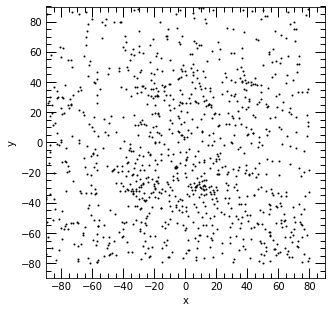

In [2]:
## read in data
data = np.loadtxt('pset1data.txt')
print(data)

## plot data
fig, ax = plt.figure(figsize=(5,5)), plt.gca()
ax.minorticks_on(  )
ax.tick_params(axis='both', which='major',direction='in',top=True,right=True,length=10,width=1)
ax.tick_params(axis='both', which='minor',direction='in',top=True,right=True, length=5,width=1)
ax.plot(data[:,0],data[:,1],'.',markersize=2,color='black');
plt.xlim(-90,90);
plt.ylim(-90,90);
plt.xlabel('x');
plt.ylabel('y');
plt.show();

In [3]:
## Generate Random galaxy positions
def gen_galaxy_positions(N=10000,pkl=False,save=False):
    """
    Generates N random galaxy positions
    """
    if pkl:
        data = pd.read_pickle(pkl)
        return data
    else:
        x = np.random.uniform(-90,80,N)
        y = np.random.uniform(-80,90,N)
        data = np.column_stack((x,y))
        if save:
            pd.to_pickle(data, save)
        return data


In [5]:
## import random galaxy positions previously generated
randGalaxies = gen_galaxy_positions(N=10000,pkl='random_galaxy_positions.pkl')

In [6]:
## get distances
def get_dist(type='dd',pkl=False,save=False):
    if pkl:
        dist = pd.read_pickle(pkl)
        return dist
    elif type == 'dd' or 'DD':
        d1 = data 
        d2 = data
    elif type=='rr' or 'RR':
        d1 = randGalaxies
        d2 = randGalaxies
    elif type == 'dr' or 'DR':
        d1 = data
        d2 = randGalaxies
    dist = [np.linalg.norm(item-d2,axis=1) for item in d1]
    if save:
        pd.to_pickle(dist, save)
    return dist